## Time taken until the first observation by default strategy

In [61]:
import numpy as np
import random
from astropy import units as u
from astropy.coordinates import SkyCoord
import scipy
import os
import subprocess
import matplotlib.pylab as plt
%matplotlib inline

os.chdir('/data/des41.a/data/jaortiz/snana-test/do_swaps/')
from make_histograms import make_histogram_vars
from make_histograms import plot_histogram
from make_swaps_arr import make_swaps
from make_swaps_arr import whisker_plot
from parse_dump import findall_KN 
from make_simlib_file import make_simlib

os.chdir('/data/des41.a/data/jaortiz/snana-test/')
from python_all.parse_simlib import parse_simlib
from python_all.python_utilities.des_io import parse_observations

In [58]:
simlib = '/data/des41.a/data/jaortiz/snana-test/simlibs/new_3_28_2_70.simlib'
#all_KN variable is use all KN? Takes either 'yes' or 'no'
all_KN = 'no'
time_taken, KN_locations = make_histogram_vars(simlib, all_KN)

os.chdir('/data/des41.a/data/jaortiz/snana-test/')

print len(KN_locations)

np.save('do_swaps/new_pointings_arrays/3_28_2_70/time_taken.npy', time_taken)
np.save('do_swaps/new_pointings_arrays/3_28_2_70/KN_locations.npy', KN_locations)

Number of LSST pointings:  2083758
Number of KN observed by snana:  414
0
50
100
150
200
250
300
350
400
414


normal 252 252
fraction_no_obs_nextweek (normal):  0.0
fraction obs next day (normal):  0.52380952381
Efficiency no swap: 0.148497
1_28_2_70 395 395
fraction_no_obs_nextweek (1_28_2_70):  0.0
fraction obs next day (1_28_2_70):  0.951898734177
Efficiency no swap: 0.232764
125_28_2_70 416 416
fraction_no_obs_nextweek (125_28_2_70):  0.0
fraction obs next day (125_28_2_70):  0.903846153846
Efficiency no swap: 0.245138
15_28_2_70 416 416
fraction_no_obs_nextweek (15_28_2_70):  0.0
fraction obs next day (15_28_2_70):  0.877403846154
Efficiency no swap: 0.245138
175_28_2_70 414 414
fraction_no_obs_nextweek (175_28_2_70):  0.0
fraction obs next day (175_28_2_70):  0.859903381643
Efficiency no swap: 0.243960
2_28_2_70 420 420
fraction_no_obs_nextweek (2_28_2_70):  0.0
fraction obs next day (2_28_2_70):  0.840476190476
Efficiency no swap: 0.247496
225_28_2_70 415 415
fraction_no_obs_nextweek (225_28_2_70):  0.0
fraction obs next day (225_28_2_70):  0.831325301205
Efficiency no swap: 0.244549
25

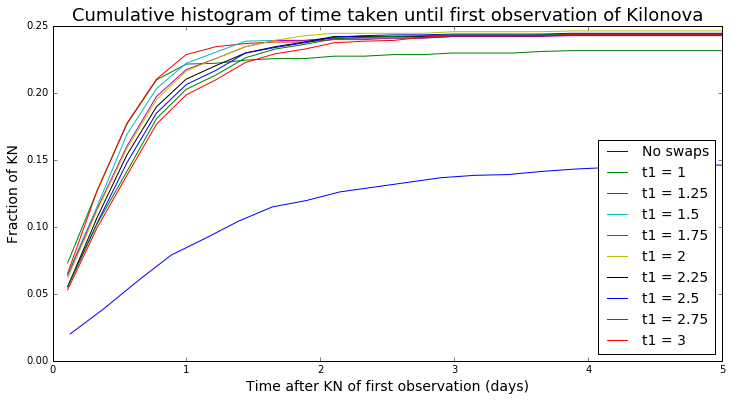

In [79]:
all_KN = 'no'
x_max= 5


t1 = ['normal', '1_28_2_70', '1.25_28_2_70', '1.5_28_2_70', '1.75_28_2_70', '2_28_2_70', '2.25_28_2_70', '2.5_28_2_70', '2.75_28_2_70', '3_28_2_70']
t1s = ['normal', '1_28_2_70', '1.5_28_2_70', '2_28_2_70']
labelss = ['No swaps', 't1 = 1', 't1 = 1.5', 't1 = 2']
labels = ['No swaps', 't1 = 1', 't1 = 1.25','t1 = 1.5', 't1 = 1.75', 't1 = 2','t1 = 2.25','t1 = 2.5','t1 = 2.75','t1 = 3']


fig1 = plt.figure(figsize=(12,6))


for i, t in enumerate(t1): 
    folder = 'do_swaps/new_pointings_arrays/' + t + '/'
    if all_KN == 'no':
        time_taken = np.load(folder + 'time_taken.npy')
        KN_locations = np.load(folder + 'KN_locations.npy')
    elif all_KN == 'yes':
        time_taken = np.load(folder + 'time_taken_all.npy')
        KN_locations = np.load(folder + 'KN_locations_all.npy')
    plot_hist_one(time_taken, KN_locations, t, i)

    
if all_KN == 'no':
    plt.title('Cumulative histogram of time taken until first observation of Kilonova', size=18)

elif all_KN == 'yes':
    plt.title('Histogram of time taken until first observation of Kilonova', size=18) #, fontweight='bold')
plt.ylabel('Fraction of KN', size=14)
plt.legend(loc= 'lower right', fontsize=14)
plt.xlim(xmax=x_max)
plt.xlabel('Time after KN of first observation (days)', size=14)

plt.show()

fig1.savefig('figures/joint_hist_t1')

# if all_KN == 'yes':
#     time_taken = np.load('do_swaps/new_pointings_arrays/normal/time_taken_all.npy')
#     KN_locations = np.load('do_swaps/new_pointings_arrays/normal/KN_locations_all.npy')

#     time_taken1 = np.load('do_swaps/new_pointings_arrays/1_28_2_70/time_taken_all.npy')
#     KN_locations1 = np.load('do_swaps/new_pointings_arrays/1_28_2_70/KN_locations_all.npy')
    
#     time_taken15 = np.load('do_swaps/new_pointings_arrays/15_28_2_70/time_taken_all.npy')
#     KN_locations15 = np.load('do_swaps/new_pointings_arrays/15_28_2_70/KN_locations_all.npy')

#     time_taken2 = np.load('do_swaps/new_pointings_arrays/2_28_2_70/time_taken_all.npy')
#     KN_locations2 = np.load('do_swaps/new_pointings_arrays/2_28_2_70/KN_locations_all.npy')
    
# if all_KN == 'no':
#     time_taken = np.load('do_swaps/new_pointings_arrays/normal/time_taken.npy')
#     KN_locations = np.load('do_swaps/new_pointings_arrays/normal/KN_locations.npy')

#     time_taken1 = np.load('do_swaps/new_pointings_arrays/1_28_2_70/time_taken.npy')
#     KN_locations1 = np.load('do_swaps/new_pointings_arrays/1_28_2_70/KN_locations.npy')
    
#     time_taken15 = np.load('do_swaps/new_pointings_arrays/15_28_2_70/time_taken.npy')
#     KN_locations15 = np.load('do_swaps/new_pointings_arrays/15_28_2_70/KN_locations.npy')
    
#     time_taken2 = np.load('do_swaps/new_pointings_arrays/2_28_2_70/time_taken.npy')
#     KN_locations2 = np.load('do_swaps/new_pointings_arrays/2_28_2_70/KN_locations.npy')

# xmax=5
# plot_joint_hist(time_taken, KN_locations, time_taken1, KN_locations1, time_taken15, KN_locations15, time_taken2, KN_locations2, all_KN, xmax)


In [77]:
def plot_hist_one(time_taken, KN_locations, t, i):
    print t, len(KN_locations), len(time_taken)
    efficiency = len(KN_locations)/1697.
    
    no_observation_nextweek= len(time_taken[np.isnan(time_taken)])
    fraction_no_obs_nextweek = float(no_observation_nextweek)/ len(KN_locations) 
    print 'fraction_no_obs_nextweek (%s): ' %t, fraction_no_obs_nextweek

    
    f =  float(sum(time_taken<1))/ len(time_taken)
    print 'fraction obs next day (%s): ' %t, f
    
    print 'Efficiency no swap: %f' %(efficiency) 

  
    #plot histogram
    histdata, binedges = np.histogram(time_taken[~np.isnan(time_taken)], 25)

    binsize = binedges[1] - binedges[0]
    
    bincentres = binedges[:-1] + binsize/2

    histdata = histdata/float(len(time_taken[~np.isnan(time_taken)])) 

    plt.plot(bincentres, np.cumsum(histdata)*efficiency*(1-fraction_no_obs_nextweek), label=labels[i])
    
    return 

fraction_no_obs_nextweek (no swaps):  0.0
fraction_no_obs_nextweek (max slew angle = 70 degrees):  0.0
fraction_no_obs_nextweek (max slew angle = 50 degrees):  0.0
Efficiency no swap: 0.148497, Efficiency min_slew=70: 0.232764, Efficiency min_slew=50: 0.224514.


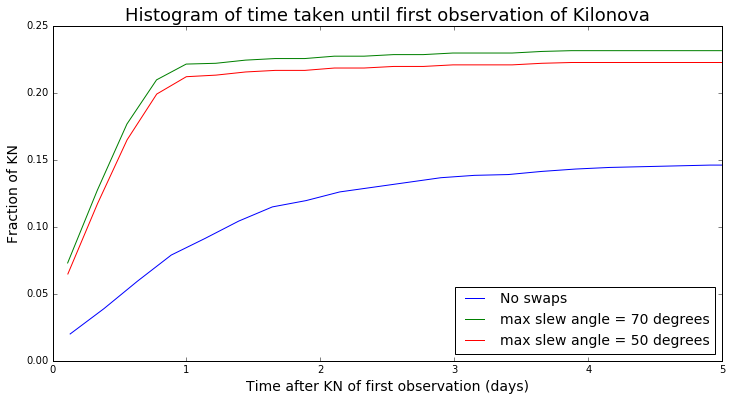

In [21]:
all_KN = 'no'

if all_KN == 'yes':
    time_taken = np.load('do_swaps/new_pointings_arrays/normal/time_taken_all.npy')
    KN_locations = np.load('do_swaps/new_pointings_arrays/normal/KN_locations_all.npy')

    time_taken1 = np.load('do_swaps/new_pointings_arrays/1_28_2_70/time_taken_all.npy')
    KN_locations1 = np.load('do_swaps/new_pointings_arrays/1_28_2_70/KN_locations_all.npy')
    
    time_taken2 = np.load('do_swaps/new_pointings_arrays/1_28_2_50/time_taken_all.npy')
    KN_locations2 = np.load('do_swaps/new_pointings_arrays/1_28_2_50/KN_locations_all.npy')
    
if all_KN == 'no':
    time_taken = np.load('do_swaps/new_pointings_arrays/normal/time_taken.npy')
    KN_locations = np.load('do_swaps/new_pointings_arrays/normal/KN_locations.npy')

    time_taken1 = np.load('do_swaps/new_pointings_arrays/1_28_2_70/time_taken.npy')
    KN_locations1 = np.load('do_swaps/new_pointings_arrays/1_28_2_70/KN_locations.npy')
    
    time_taken2 = np.load('do_swaps/new_pointings_arrays/1_28_2_50/time_taken.npy')
    KN_locations2 = np.load('do_swaps/new_pointings_arrays/1_28_2_50/KN_locations.npy')

xmax=5
plot_joint_hist_ang (time_taken, KN_locations, time_taken1, KN_locations1, time_taken2, KN_locations2, all_KN, xmax)


In [43]:
def plot_joint_hist(time_taken, KN_locations, time_taken1, KN_locations1,time_taken15, KN_locations15,time_taken2, KN_locations2, all_KN, x_max):
    
    efficiency,efficiency1,efficiency15,efficiency2 = len(KN_locations)/1697.,len(KN_locations1)/1697.,len(KN_locations15)/1697.,len(KN_locations2)/1697.
    
    no_observation_nextweek, no_observation_nextweek1 = len(time_taken[np.isnan(time_taken)]), len(time_taken1[np.isnan(time_taken1)])
    no_observation_nextweek15, no_observation_nextweek2 = len(time_taken15[np.isnan(time_taken15)]), len(time_taken2[np.isnan(time_taken2)])
    fraction_no_obs_nextweek = float(no_observation_nextweek)/ len(KN_locations) 
    fraction_no_obs_nextweek1 = float(no_observation_nextweek1)/ len(KN_locations1)
    fraction_no_obs_nextweek15 = float(no_observation_nextweek15)/ len(KN_locations15)
    fraction_no_obs_nextweek2 = float(no_observation_nextweek2)/ len(KN_locations2)
    print 'fraction_no_obs_nextweek (no swaps): ', fraction_no_obs_nextweek
    print 'fraction_no_obs_nextweek (t1=1): ', fraction_no_obs_nextweek1
    print 'fraction_no_obs_nextweek (t1=1.5): ', fraction_no_obs_nextweek15
    print 'fraction_no_obs_nextweek (t1=1): ', fraction_no_obs_nextweek2
    
    f =  float(sum(time_taken<1))/ len(time_taken)
    f1 =  float(sum(time_taken1<1))/ len(time_taken1)
    f15 =  float(sum(time_taken15<1))/ len(time_taken15)
    f2 =  float(sum(time_taken2<1))/ len(time_taken2)
    print 'fraction obs next day (no swaps): ', f
    print 'fraction obs next day (t1=1): ', f1
    print 'fraction obs nexy day (t1=1.5): ', f15
    print 'fraction obs next day (t1=1): ', f2
    
    
    #plot histogram
    histdata, binedges = np.histogram(time_taken[~np.isnan(time_taken)], 25)
    histdata1, binedges1 = np.histogram(time_taken1[~np.isnan(time_taken1)], 25)
    histdata15, binedges15 = np.histogram(time_taken15[~np.isnan(time_taken15)], 25)
    histdata2, binedges2 = np.histogram(time_taken2[~np.isnan(time_taken2)], 25)

    binsize = binedges[1] - binedges[0]
    binsize1 = binedges1[1] - binedges1[0]
    binsize15 = binedges15[1] - binedges15[0]
    binsize2 = binedges2[1] - binedges2[0]

    bincentres = binedges[:-1] + binsize/2
    bincentres1 = binedges1[:-1] + binsize1/2
    bincentres15 = binedges15[:-1] + binsize15/2
    bincentres2 = binedges2[:-1] + binsize2/2

    histdata = histdata/float(len(time_taken[~np.isnan(time_taken)])) 
    histdata1 = histdata1/float(len(time_taken1[~np.isnan(time_taken1)])) 
    histdata15 = histdata15/float(len(time_taken15[~np.isnan(time_taken15)])) 
    histdata2 = histdata2/float(len(time_taken2[~np.isnan(time_taken2)])) 


    fig1 = plt.figure(figsize=(12,6))
    #plt.subplot(2,1,1)
    plt.plot(bincentres, np.cumsum(histdata)*efficiency*(1-fraction_no_obs_nextweek), label='No swaps')
    plt.plot(bincentres1, np.cumsum(histdata1)*efficiency1*(1-fraction_no_obs_nextweek1), label='t1 = 1')
    plt.plot(bincentres15, np.cumsum(histdata15)*efficiency15*(1-fraction_no_obs_nextweek15), label='t1 = 1.5')
    plt.plot(bincentres2, np.cumsum(histdata2)*efficiency2*(1-fraction_no_obs_nextweek2), label='t1 = 2')

    if all_KN == 'no':
        plt.title('Cumulative histogram of time taken until first observation of Kilonova', size=18)
        print 'Efficiency no swap: %f, Efficiency t1=1: %f, Efficiency t1=1.5: %f, Efficiency t1=2: %f' %(efficiency, efficiency1, efficiency15, efficiency2) 
        
    elif all_KN == 'yes':
        plt.title('Histogram of time taken until first observation of Kilonova', size=18) #, fontweight='bold')
    plt.ylabel('Fraction of KN', size=14)
    plt.legend(loc= 'lower right', fontsize=14)
    plt.xlim(xmax=x_max)
    plt.xlabel('Time after KN of first observation (days)', size=14)

    #plt.annotate('Cumulative histogram', xy=(2.8, 0.635), size=12)


#     plt.subplot(2,1,2)
#     plt.plot(bincentres, histdata*efficiency*(1-fraction_no_obs_nextweek), label='No swaps')
#     plt.plot(bincentres1, histdata1*efficiency1*(1-fraction_no_obs_nextweek1), label='t1 = 1')
#     plt.plot(bincentres15, histdata15*efficiency15*(1-fraction_no_obs_nextweek15), label='t1 = 1.5')
#     plt.plot(bincentres2, histdata2*efficiency2*(1-fraction_no_obs_nextweek2), label='t1 = 2')
#    
#     plt.legend(loc= 'center right')
#     plt.ylabel('Fraction of KN', size=12)
#     plt.xlabel('Time after KN of first observation (days)', size=12)
#     plt.xlim(xmax=x_max)
#     plt.annotate('Histogram', xy=(3.18, 0.162), size=12)

    plt.show()
    
    fig1.savefig('figures/joint_hist_t1')
    
    return 

In [20]:
def plot_joint_hist_ang(time_taken, KN_locations, time_taken1, def plot_joint_hist(time_taken, KN_locations, time_taken1, KN_locations1,time_taken15, KN_locations15,time_taken2, KN_locations2, all_KN, x_max):
    
    efficiency,efficiency1,efficiency15,efficiency2 = len(KN_locations)/1697.,len(KN_locations1)/1697.,len(KN_locations15)/1697.,len(KN_locations2)/1697.
    
    no_observation_nextweek, no_observation_nextweek1 = len(time_taken[np.isnan(time_taken)]), len(time_taken1[np.isnan(time_taken1)])
    no_observation_nextweek15, no_observation_nextweek2 = len(time_taken15[np.isnan(time_taken15)]), len(time_taken2[np.isnan(time_taken2)])
    fraction_no_obs_nextweek = float(no_observation_nextweek)/ len(KN_locations) 
    fraction_no_obs_nextweek1 = float(no_observation_nextweek1)/ len(KN_locations1)
    fraction_no_obs_nextweek15 = float(no_observation_nextweek15)/ len(KN_locations15)
    fraction_no_obs_nextweek2 = float(no_observation_nextweek2)/ len(KN_locations2)
    print 'fraction_no_obs_nextweek (no swaps): ', fraction_no_obs_nextweek
    print 'fraction_no_obs_nextweek (t1=1): ', fraction_no_obs_nextweek1
    print 'fraction_no_obs_nextweek (t1=1.5): ', fraction_no_obs_nextweek15
    print 'fraction_no_obs_nextweek (t1=1): ', fraction_no_obs_nextweek2
    
    f =  float(sum(time_taken<1))/ len(time_taken)
    f1 =  float(sum(time_taken1<1))/ len(time_taken1)
    f15 =  float(sum(time_taken15<1))/ len(time_taken15)
    f2 =  float(sum(time_taken2<1))/ len(time_taken2)
    print 'fraction obs next day (no swaps): ', f
    print 'fraction obs next day (t1=1): ', f1
    print 'fraction obs nexy day (t1=1.5): ', f15
    print 'fraction obs next day (t1=1): ', f2
    
    
    #plot histogram
    histdata, binedges = np.histogram(time_taken[~np.isnan(time_taken)], 25)
    histdata1, binedges1 = np.histogram(time_taken1[~np.isnan(time_taken1)], 25)
    histdata15, binedges15 = np.histogram(time_taken15[~np.isnan(time_taken15)], 25)
    histdata2, binedges2 = np.histogram(time_taken2[~np.isnan(time_taken2)], 25)

    binsize = binedges[1] - binedges[0]
    binsize1 = binedges1[1] - binedges1[0]
    binsize15 = binedges15[1] - binedges15[0]
    binsize2 = binedges2[1] - binedges2[0]

    bincentres = binedges[:-1] + binsize/2
    bincentres1 = binedges1[:-1] + binsize1/2
    bincentres15 = binedges15[:-1] + binsize15/2
    bincentres2 = binedges2[:-1] + binsize2/2

    histdata = histdata/float(len(time_taken[~np.isnan(time_taken)])) 
    histdata1 = histdata1/float(len(time_taken1[~np.isnan(time_taken1)])) 
    histdata15 = histdata15/float(len(time_taken15[~np.isnan(time_taken15)])) 
    histdata2 = histdata2/float(len(time_taken2[~np.isnan(time_taken2)])) 


    fig1 = plt.figure(figsize=(12,6))
    #plt.subplot(2,1,1)
    plt.plot(bincentres, np.cumsum(histdata)*efficiency*(1-fraction_no_obs_nextweek), label='No swaps')
    plt.plot(bincentres1, np.cumsum(histdata1)*efficiency1*(1-fraction_no_obs_nextweek1), label='t1 = 1')
    plt.plot(bincentres15, np.cumsum(histdata15)*efficiency15*(1-fraction_no_obs_nextweek15), label='t1 = 1.5')
    plt.plot(bincentres2, np.cumsum(histdata2)*efficiency2*(1-fraction_no_obs_nextweek2), label='t1 = 2')

    if all_KN == 'no':
        plt.title('Cumulative histogram of time taken until first observation of Kilonova', size=18)
        print 'Efficiency no swap: %f, Efficiency t1=1: %f, Efficiency t1=1.5: %f, Efficiency t1=2: %f' %(efficiency, efficiency1, efficiency15, efficiency2) 
        
    elif all_KN == 'yes':
        plt.title('Histogram of time taken until first observation of Kilonova', size=18) #, fontweight='bold')
    plt.ylabel('Fraction of KN', size=14)
    plt.legend(loc= 'lower right', fontsize=14)
    plt.xlim(xmax=x_max)
    plt.xlabel('Time after KN of first observation (days)', size=14)

    #plt.annotate('Cumulative histogram', xy=(2.8, 0.635), size=12)


#     plt.subplot(2,1,2)
#     plt.plot(bincentres, histdata*efficiency*(1-fraction_no_obs_nextweek), label='No swaps')
#     plt.plot(bincentres1, histdata1*efficiency1*(1-fraction_no_obs_nextweek1), label='t1 = 1')
#     plt.plot(bincentres15, histdata15*efficiency15*(1-fraction_no_obs_nextweek15), label='t1 = 1.5')
#     plt.plot(bincentres2, histdata2*efficiency2*(1-fraction_no_obs_nextweek2), label='t1 = 2')
#    
#     plt.legend(loc= 'center right')
#     plt.ylabel('Fraction of KN', size=12)
#     plt.xlabel('Time after KN of first observation (days)', size=12)
#     plt.xlim(xmax=x_max)
#     plt.annotate('Histogram', xy=(3.18, 0.162), size=12)

    plt.show()
    
    fig1.savefig('figures/joint_hist_t1')
    
    return KN_locations1, time_taken2, KN_locations2, all_KN, x_max):
    
    efficiency,efficiency1,efficiency2 = len(KN_locations)/1697.,len(KN_locations1)/1697.,len(KN_locations2)/1697.
    
    no_observation_nextweek, no_observation_nextweek1 = len(time_taken[np.isnan(time_taken)]), len(time_taken1[np.isnan(time_taken1)])
    no_observation_nextweek2 = len(time_taken2[np.isnan(time_taken2)])
    fraction_no_obs_nextweek = float(no_observation_nextweek)/ len(KN_locations) 
    fraction_no_obs_nextweek1 = float(no_observation_nextweek1)/ len(KN_locations1)
    fraction_no_obs_nextweek2 = float(no_observation_nextweek2)/ len(KN_locations2)
    print 'fraction_no_obs_nextweek (no swaps): ', fraction_no_obs_nextweek
    print 'fraction_no_obs_nextweek (max slew angle = 70 degrees): ', fraction_no_obs_nextweek1
    print 'fraction_no_obs_nextweek (max slew angle = 50 degrees): ', fraction_no_obs_nextweek2

       
    #plot histogram
    histdata, binedges = np.histogram(time_taken[~np.isnan(time_taken)], 25)
    histdata1, binedges1 = np.histogram(time_taken1[~np.isnan(time_taken1)], 25)
    histdata2, binedges2 = np.histogram(time_taken2[~np.isnan(time_taken2)], 25)

    binsize = binedges[1] - binedges[0]
    binsize1 = binedges1[1] - binedges1[0]
    binsize2 = binedges2[1] - binedges2[0]

    bincentres = binedges[:-1] + binsize/2
    bincentres1 = binedges1[:-1] + binsize1/2
    bincentres2 = binedges2[:-1] + binsize2/2

    histdata = histdata/float(len(time_taken[~np.isnan(time_taken)])) 
    histdata1 = histdata1/float(len(time_taken1[~np.isnan(time_taken1)])) 
    histdata2 = histdata2/float(len(time_taken2[~np.isnan(time_taken2)])) 


    fig1 = plt.figure(figsize=(12,6))
    #plt.subplot(2,1,1)
    plt.plot(bincentres, np.cumsum(histdata)*efficiency*(1-fraction_no_obs_nextweek), label='No swaps')
    plt.plot(bincentres1, np.cumsum(histdata1)*efficiency1*(1-fraction_no_obs_nextweek1), label='max slew angle = 70 degrees')
    plt.plot(bincentres2, np.cumsum(histdata2)*efficiency2*(1-fraction_no_obs_nextweek2), label='max slew angle = 50 degrees')

    if all_KN == 'no':
        plt.title('Histogram of time taken until first observation of Kilonova', size=18)
        print 'Efficiency no swap: %f, Efficiency min_slew=70: %f, Efficiency min_slew=50: %f.' %(efficiency, efficiency1, efficiency2)
    elif all_KN == 'yes':
        plt.title('Histogram of time taken until first observation of Kilonova', size=18)
    plt.ylabel('Fraction of KN', size=14)
    plt.legend(loc= 'lower right',fontsize=14)
    plt.xlim(xmax=x_max)
    plt.xlabel('Time after KN of first observation (days)', size=14)
    #plt.annotate('Cumulative histogram', xy=(2.8, 0.635), size=12)


#     plt.subplot(2,1,2)
#     plt.plot(bincentres, histdata*efficiency*(1-fraction_no_obs_nextweek), label='No swaps')
#     plt.plot(bincentres1, histdata1*efficiency1*(1-fraction_no_obs_nextweek1), label='t1 = 1')
#     plt.plot(bincentres2, histdata2*efficiency2*(1-fraction_no_obs_nextweek2), label='t1 = 2')
    
#     plt.legend(loc= 'center right')
#     plt.ylabel('Fraction of KN', size=12)
#     plt.xlabel('Time after KN of first observation (days)', size=12)
#     plt.xlim(xmax=x_max)
#     plt.annotate('Histogram', xy=(3.18, 0.162), size=12)

    plt.show()
    
#    fig1.savefig('figures/joint_hist_ang')
    
    return 